In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from scipy import stats
import seaborn as sns
from scipy.stats import chi2_contingency

# Correlation Analysis
#### This will bring up any relations that the variables have which we need to consider while performing further analysis. It is commonly very easily visible in a scatter plot as to what the possible relations are between variables. After, we can define what are the possible relations, we can then check how strong their relationship is using a correlation coefficient. The one that we will be using here is the Pearson Moment Correlation.

array([[<AxesSubplot:xlabel='Applicant ID', ylabel='Applicant ID'>,
        <AxesSubplot:xlabel='No of years in the current address', ylabel='Applicant ID'>,
        <AxesSubplot:xlabel='No. of Years in the current job', ylabel='Applicant ID'>,
        <AxesSubplot:xlabel='Monthly Salary', ylabel='Applicant ID'>,
        <AxesSubplot:xlabel='Balance in Savings Account', ylabel='Applicant ID'>,
        <AxesSubplot:xlabel='Loan Amount Requested', ylabel='Applicant ID'>,
        <AxesSubplot:xlabel='Term', ylabel='Applicant ID'>,
        <AxesSubplot:xlabel='Down Payment ', ylabel='Applicant ID'>,
        <AxesSubplot:xlabel='EMI Affordable ', ylabel='Applicant ID'>],
       [<AxesSubplot:xlabel='Applicant ID', ylabel='No of years in the current address'>,
        <AxesSubplot:xlabel='No of years in the current address', ylabel='No of years in the current address'>,
        <AxesSubplot:xlabel='No. of Years in the current job', ylabel='No of years in the current address'>,
        <AxesS

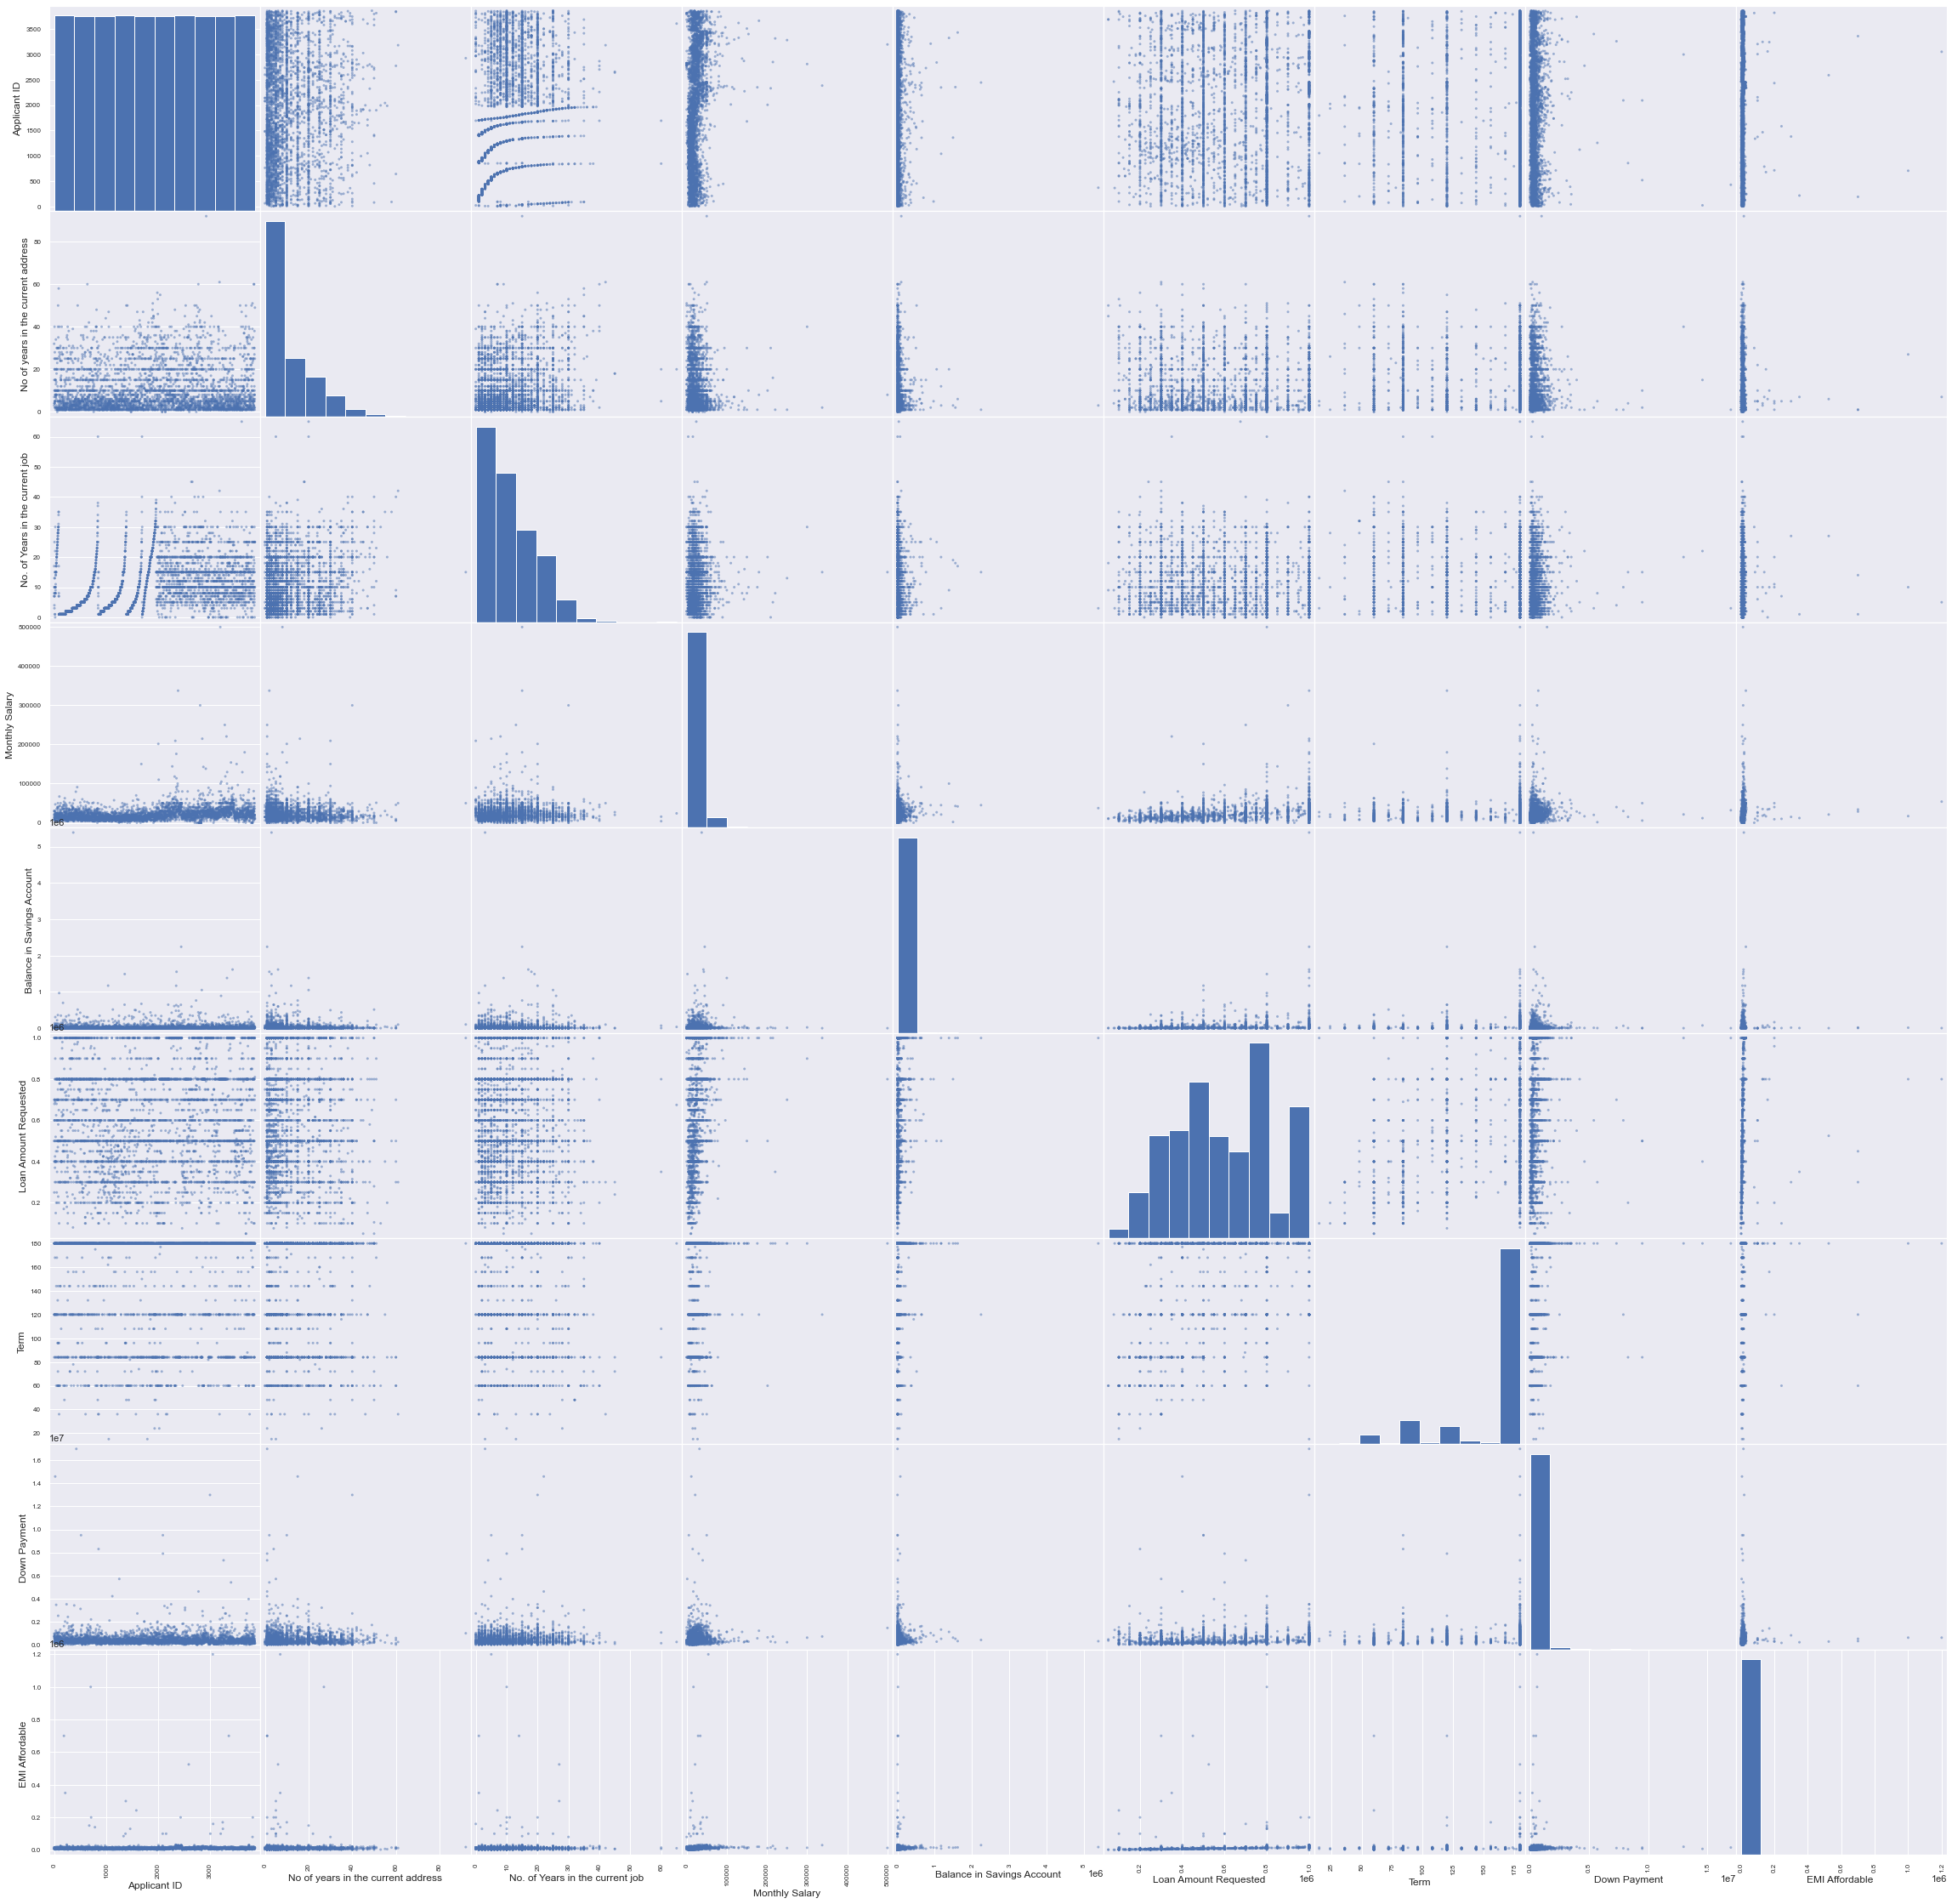

In [29]:
data = pd.read_csv ("BKB.csv")
pd.plotting.scatter_matrix(data,figsize=(40,40))

Text(0.5, 1.0, 'Pearson Correlation')

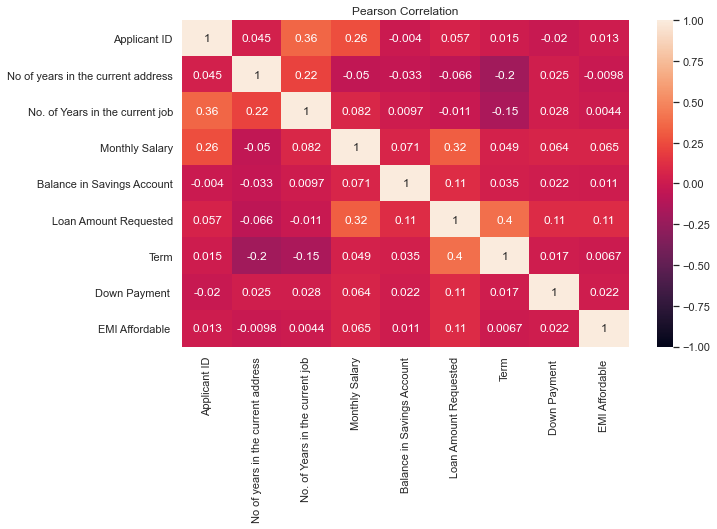

In [30]:
data.corr()
r = data.corr()
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
plt.title("Pearson Correlation")

#### A correlation value is always between -1 and 1. When the value is closer to 1 we say they are related postively together and if the value is closer to -1 then we can say that they are related negatively. If the value is nearer to 0, we can say that there is no influence of the variable on the other. What can you conclude from the above correlations made and which do you think are appropriate for a regression analysis.

# Data Cleaning
#### Data Cleaning is where we fix the bad data that is present in our dataset. Bad data could be empty cells, data in the wrong format or duplicate data. Bad data could result in the conclusion made from the data unreliable and has to be removed before we perform any form or analysis. 

## Dealing with null values

In [14]:
df = pd.read_csv('Unit5_data_assignment.csv')
missing = pd.DataFrame()
for i in range(len(df.index)) :
    if(df.iloc[i].isnull().sum() > 0):
        missing[i] = df.iloc[i]
missing

,15,19,21,25,30
Duration,60.0,60.0,NaN,60.0,60.0
Date,16-12-2020,19-12-2020,21-12-2020,NaN,30-12-2020
Pulse,98.0,NaN,108.0,102.0,102.0
Maxpulse,NaN,123.0,131.0,126.0,129.0
Calories,275.0,323.0,364.2,334.5,NaN


In [15]:
df.isnull().sum()

Duration     1
Date         1
Pulse        1
Maxpulse     1
Calories     1
dtype: int64

## Technique 1) Removing rows with empty cells.

In [17]:
df = pd.read_csv('Unit5_data_assignment.csv')
new_df = df.dropna()
print(new_df)

    Duration         Date  Pulse   Maxpulse   Calories
0        60.0  01-12-2020   110.0      130.0     409.1
1        60.0  02-12-2020   117.0      145.0     479.0
2        60.0  03-12-2020   103.0      135.0     340.0
3        45.0  04-12-2020   109.0      175.0     282.4
4        45.0  05-12-2020   117.0      148.0     406.0
5        60.0  06-12-2020   102.0      127.0     300.0
6        60.0  07-12-2020   110.0      136.0     374.0
7        45.0  08-12-2020   104.0      134.0     253.3
8        30.0  09-12-2020   109.0      133.0     195.1
9        60.0  10-12-2020    98.0      124.0     269.0
10       60.0  11-12-2020   103.0      147.0     329.3
11       60.0  12-12-2020   100.0      120.0     250.7
12       60.0  13-12-2020   100.0      120.0     250.7
13       60.0  14-12-2020   106.0      128.0     345.3
14       60.0  15-12-2020   104.0      132.0     379.3
16       60.0  17-12-2020    98.0      120.0     215.2
17       60.0  17-12-2020   100.0      120.0     300.0
18       4

In [19]:
df = pd.read_csv('Unit5_data_assignment.csv')
df.dropna(inplace = True)
print(df)

    Duration         Date  Pulse   Maxpulse   Calories
0        60.0  01-12-2020   110.0      130.0     409.1
1        60.0  02-12-2020   117.0      145.0     479.0
2        60.0  03-12-2020   103.0      135.0     340.0
3        45.0  04-12-2020   109.0      175.0     282.4
4        45.0  05-12-2020   117.0      148.0     406.0
5        60.0  06-12-2020   102.0      127.0     300.0
6        60.0  07-12-2020   110.0      136.0     374.0
7        45.0  08-12-2020   104.0      134.0     253.3
8        30.0  09-12-2020   109.0      133.0     195.1
9        60.0  10-12-2020    98.0      124.0     269.0
10       60.0  11-12-2020   103.0      147.0     329.3
11       60.0  12-12-2020   100.0      120.0     250.7
12       60.0  13-12-2020   100.0      120.0     250.7
13       60.0  14-12-2020   106.0      128.0     345.3
14       60.0  15-12-2020   104.0      132.0     379.3
16       60.0  17-12-2020    98.0      120.0     215.2
17       60.0  17-12-2020   100.0      120.0     300.0
18       4

#### Inplace=true ensures that values are replaced in the original dataframe

## Technique 2)Replacing with the mean

In [20]:
df = pd.read_csv('Unit5_data_assignment.csv')
x = df["Calories"].mean()
df["Calories"].fillna(x, inplace = True)
print(df)

    Duration         Date  Pulse   Maxpulse       Calories
0        60.0  01-12-2020   110.0      130.0    409.100000
1        60.0  02-12-2020   117.0      145.0    479.000000
2        60.0  03-12-2020   103.0      135.0    340.000000
3        45.0  04-12-2020   109.0      175.0    282.400000
4        45.0  05-12-2020   117.0      148.0    406.000000
5        60.0  06-12-2020   102.0      127.0    300.000000
6        60.0  07-12-2020   110.0      136.0    374.000000
7        45.0  08-12-2020   104.0      134.0    253.300000
8        30.0  09-12-2020   109.0      133.0    195.100000
9        60.0  10-12-2020    98.0      124.0    269.000000
10       60.0  11-12-2020   103.0      147.0    329.300000
11       60.0  12-12-2020   100.0      120.0    250.700000
12       60.0  13-12-2020   100.0      120.0    250.700000
13       60.0  14-12-2020   106.0      128.0    345.300000
14       60.0  15-12-2020   104.0      132.0    379.300000
15       60.0  16-12-2020    98.0        NaN    275.0000

## Technique 3) Removing only rows that have missing values and the values cannot be replaced by mean/median/mode

In [22]:
df = pd.read_csv('Unit5_data_assignment.csv')
df.dropna(subset=['Date'], inplace = True)
print(df)

    Duration         Date  Pulse   Maxpulse   Calories
0        60.0  01-12-2020   110.0      130.0     409.1
1        60.0  02-12-2020   117.0      145.0     479.0
2        60.0  03-12-2020   103.0      135.0     340.0
3        45.0  04-12-2020   109.0      175.0     282.4
4        45.0  05-12-2020   117.0      148.0     406.0
5        60.0  06-12-2020   102.0      127.0     300.0
6        60.0  07-12-2020   110.0      136.0     374.0
7        45.0  08-12-2020   104.0      134.0     253.3
8        30.0  09-12-2020   109.0      133.0     195.1
9        60.0  10-12-2020    98.0      124.0     269.0
10       60.0  11-12-2020   103.0      147.0     329.3
11       60.0  12-12-2020   100.0      120.0     250.7
12       60.0  13-12-2020   100.0      120.0     250.7
13       60.0  14-12-2020   106.0      128.0     345.3
14       60.0  15-12-2020   104.0      132.0     379.3
15       60.0  16-12-2020    98.0        NaN     275.0
16       60.0  17-12-2020    98.0      120.0     215.2
17       6

# Wrong data

#### How to detect wrong data? These are outliers that are really far away from the data. These may be present or not be present in your data. However, you have to check for them and depending on your problem statement these should either be analyzed further or removed from your data as they are considered to be an error.

<AxesSubplot:>

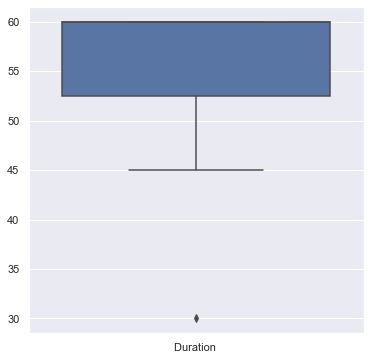

In [24]:
df = pd.read_csv('Unit5_data_assignment.csv')
sns.set(rc = {'figure.figsize':(6,6)})
sns.boxplot(data=df[["Duration "]])

In [25]:
df_filtered = df[df['Duration '] >= 100]
print(df_filtered)

Empty DataFrame
Columns: [Duration , Date, Pulse , Maxpulse , Calories]
Index: []


In [26]:
df_filtered = df[df['Duration '] <= 100]
print(df_filtered)

    Duration         Date  Pulse   Maxpulse   Calories
0        60.0  01-12-2020   110.0      130.0     409.1
1        60.0  02-12-2020   117.0      145.0     479.0
2        60.0  03-12-2020   103.0      135.0     340.0
3        45.0  04-12-2020   109.0      175.0     282.4
4        45.0  05-12-2020   117.0      148.0     406.0
5        60.0  06-12-2020   102.0      127.0     300.0
6        60.0  07-12-2020   110.0      136.0     374.0
7        45.0  08-12-2020   104.0      134.0     253.3
8        30.0  09-12-2020   109.0      133.0     195.1
9        60.0  10-12-2020    98.0      124.0     269.0
10       60.0  11-12-2020   103.0      147.0     329.3
11       60.0  12-12-2020   100.0      120.0     250.7
12       60.0  13-12-2020   100.0      120.0     250.7
13       60.0  14-12-2020   106.0      128.0     345.3
14       60.0  15-12-2020   104.0      132.0     379.3
15       60.0  16-12-2020    98.0        NaN     275.0
16       60.0  17-12-2020    98.0      120.0     215.2
17       6

# Dealing with duplicates

In [27]:
print(df.duplicated())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
dtype: bool


In [28]:
df.drop_duplicates(inplace = True)
df

,Duration,Date,Pulse,Maxpulse,Calories
0,60.0,01-12-2020,110.0,130.0,409.1
1,60.0,02-12-2020,117.0,145.0,479.0
2,60.0,03-12-2020,103.0,135.0,340.0
3,45.0,04-12-2020,109.0,175.0,282.4
4,45.0,05-12-2020,117.0,148.0,406.0
5,60.0,06-12-2020,102.0,127.0,300.0
6,60.0,07-12-2020,110.0,136.0,374.0
7,45.0,08-12-2020,104.0,134.0,253.3
8,30.0,09-12-2020,109.0,133.0,195.1
9,60.0,10-12-2020,98.0,124.0,269.0


# Regression Analysis

#### Regression searches for relationships among variables. Generally, in regression analysis, you consider some phenomenon of interest and have a number of observations. Each observation has two or more features. Following the assumption that at least one of the features depends on the others, you try to establish a relation among them. The dependent features are called the dependent variables, outputs, or responses. The independent features are called the independent variables, inputs, regressors, or predictors. Typically, you need regression to answer whether and how some phenomenon influences the other or how several variables are related. 

#### Regression is also useful when you want to forecast a response using a new set of predictors. There are many types of regression, but we will be focusing on linear regression for now.

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv ("BKB.csv")
sal_data=data[data['Monthly Salary'] == '8000']
nosal_data=data[data['Marital Status'] != '8000']

In [38]:
x, y = data["Monthly Salary"], data["No. of Years in the current job"]
print("Initial shape",x.shape, y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print("Training Data: ",x_train.shape, y_train.shape)
print("Testing Data: ",x_test.shape, y_test.shape)

Initial shape (3864,) (3864,)
Training Data:  (3091,) (3091,)
Testing Data:  (773,) (773,)


In [39]:
model = LinearRegression()
model.fit(np.array(x_train).reshape((-1, 1)), y_train)

LinearRegression()

# Judging our model

In [40]:
r_sq = model.score(np.array(x_train).reshape((-1, 1)), y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.006076524973102071
intercept: 10.308255462385917
slope: [3.23900187e-05]


## Performing Testing